In [2]:
# import relative python libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import datetime as dt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')


In [3]:
mydata = pd.read_csv('D:\\Data_science_project\\Data_science_project\\uber _data\\My Uber Drives - 2016.csv')

In [4]:
mydata.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [5]:
mydata.tail()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [6]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [7]:
mydata.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

We can find that this dataset has seven columns ( START_DATE , END_DATE, CATEGORY , START , STOP , MILES , PURPOSE )and totally 1156 rows . Another thing we shoule notice is that there are a lot of missing values in PURPOSES.If we want to get a good result,we need to fill the missing data.*

We also should notice that the last row is "Totals" that is unusage data, so we can delete this row

In [8]:
# Copy a dataset
datacopy = mydata.copy()

In [9]:
# delete the last line
datacopy = datacopy.drop(datacopy.index[1155])

In [10]:
start_list = [info.split(' ') for info in datacopy['START_DATE*'].tolist()]
stop_list  = [info.split(' ') for info in datacopy['END_DATE*'].tolist()]

start  = pd.DataFrame(start_list,columns=['Start_Date','Start_Time'])
end    = pd.DataFrame(stop_list,columns=['End_Date','End_Time'])

sub_data = datacopy[['CATEGORY*','START*','STOP*','MILES*','PURPOSE*']]
start_end_total = pd.concat([start,end,],axis=1)

In [11]:
datacopy = pd.concat([ start_end_total, sub_data],axis=1)

In [12]:
datacopy.head(10)

,Start_Date,Start_Time,End_Date,End_Time,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016,21:11,1/1/2016,21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016,1:25,1/2/2016,1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016,20:25,1/2/2016,20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016,17:31,1/5/2016,17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016,14:42,1/6/2016,15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,1/6/2016,17:15,1/6/2016,17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,1/6/2016,17:30,1/6/2016,17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,1/7/2016,13:27,1/7/2016,13:33,Business,Cary,Cary,0.8,Meeting
8,1/10/2016,8:05,1/10/2016,8:25,Business,Cary,Morrisville,8.3,Meeting
9,1/10/2016,12:17,1/10/2016,12:44,Business,Jamaica,New York,16.5,Customer Visit


1. MILES

We can divide the MILES data to 5 sets ("<=5","5-10","10-15","15-20",">20") according to different distance ,and then find their travel frequence of each set.*

Miles:
 <=5      502
5-10     338
10-15    161
>20       83
15-20     71
dtype: int64


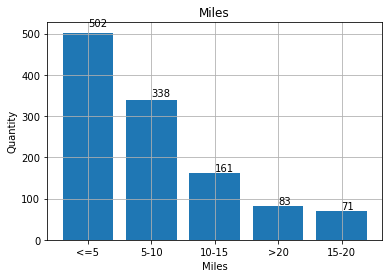

In [13]:
ml_dis=datacopy["MILES*"]
ml_range_lst=["<=5","5-10","10-15","15-20",">20"]
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2., 1.03*height, '%s' % int(height))
ml_dic=dict()
for item in ml_range_lst:
    ml_dic[item]=0
for mile in ml_dis.values:
    if mile<=5:
        ml_dic["<=5"]+=1
    elif mile<=10:
        ml_dic["5-10"]+=1
    elif mile<=15:
        ml_dic["10-15"]+=1
    elif mile<=20:
        ml_dic["15-20"]+=1
    else:
        ml_dic[">20"]+=1
ml_dis=pd.Series(ml_dic)
ml_dis.sort_values(inplace=True,ascending=False)
print("Miles:\n",ml_dis)
#figure
rects=plt.bar(range(1,len(ml_dis.index)+1),ml_dis.values)
plt.title("Miles")
plt.xlabel("Miles")
plt.ylabel("Quantity")
plt.xticks(range(1,len(ml_dis.index)+1),ml_dis.index)
plt.grid()
autolabel(rects)
plt.savefig("./ml_dis_fig")

We can find that there is a decreasing trends. The largest number is 502(<=5 miles), following by 338(5 - 10 miles)、161( 10- 15 miles).And most of the travelling distence is less than 15 miles.

2. PURPOSE:

In [14]:
datacopy['PURPOSE*'].value_counts()

Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE*, dtype: int64

<AxesSubplot:xlabel='PURPOSE*', ylabel='count'>

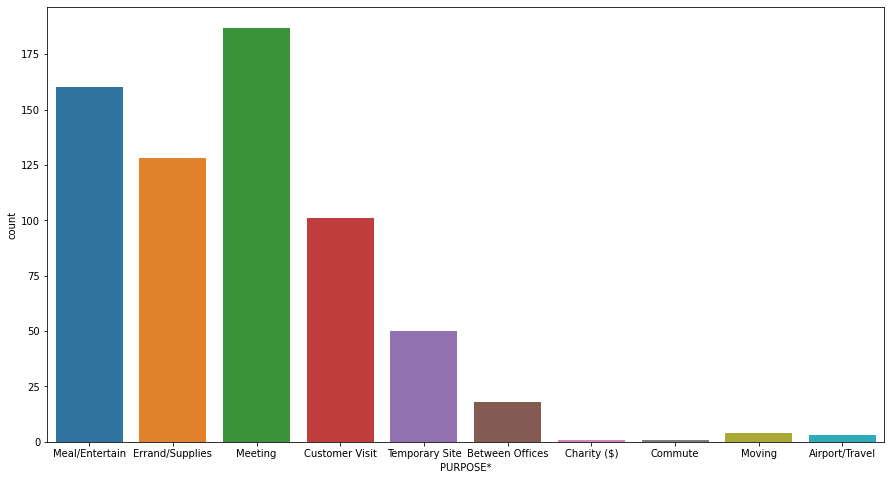

In [15]:
plt.figure(figsize=(15,8))
sns.countplot(datacopy['PURPOSE*'])

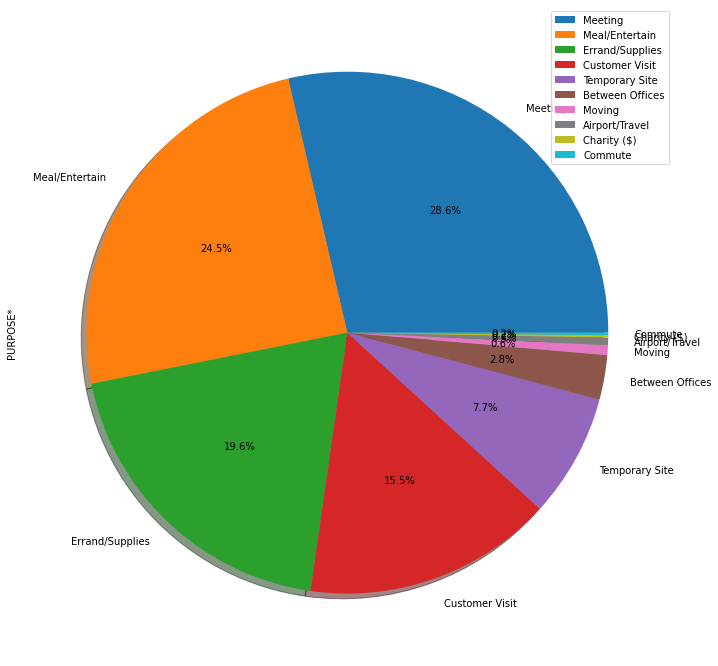

In [16]:
plt.figure(figsize=(12,12))
datacopy['PURPOSE*'].value_counts()[:11].plot(kind='pie',autopct='%1.1f%%',shadow=True,legend = True)
plt.show()

3. [ CTEGORY]Let's see what happend in CTEGORY*.**

In [17]:
datacopy['CATEGORY*'].value_counts()

Business    1078
Personal      77
Name: CATEGORY*, dtype: int64

<AxesSubplot:xlabel='CATEGORY*', ylabel='count'>

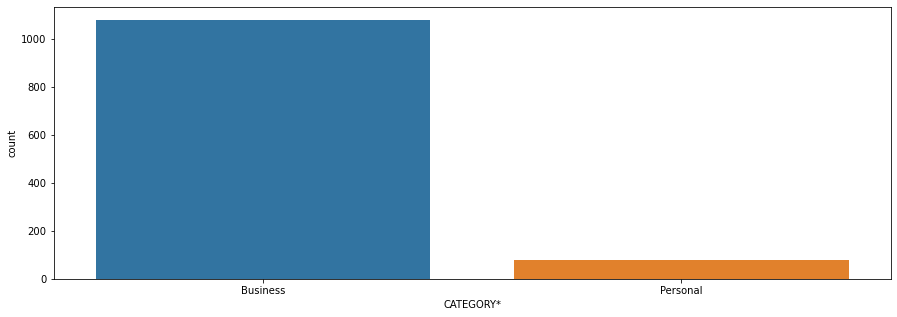

In [18]:
plt.figure(figsize=(15,5))
sns.countplot(datacopy['CATEGORY*'])

We can find the number of "business" is far lager than "personal", respectively 1078, 77.



4. Start_Date & End_Date



In [19]:
datacopy["Start_Date"]=pd.to_datetime(datacopy["Start_Date"],format="%m/%d/%Y")
per_month=datacopy['Start_Date'].dt.month.value_counts()
per_month=per_month.sort_index()
per_month_mean = per_month.mean()
print("Month Distribute:\n",per_month)



Month Distribute:
 1      61
2     115
3     113
4      54
5      49
6     108
7     112
8     133
9      36
10    106
11    122
12    146
Name: Start_Date, dtype: int64


<AxesSubplot:xlabel='Start_Date', ylabel='count'>

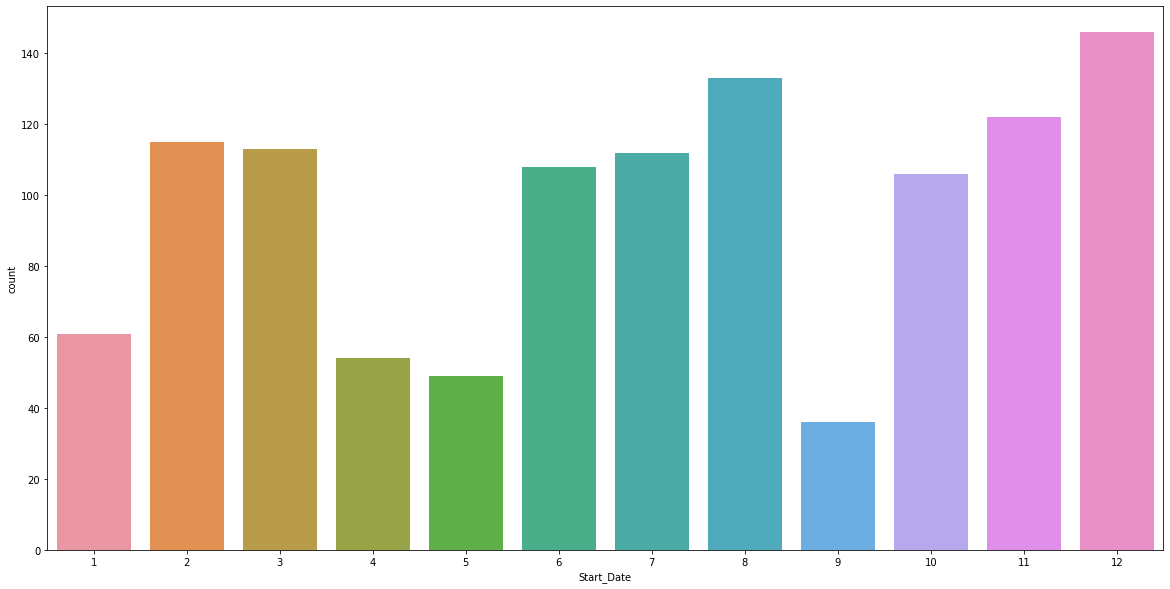

In [20]:
plt.figure(figsize=(20,10))
sns.countplot(datacopy['Start_Date'].dt.month)

December has the lagerst number 146. In contast, september is lowest, and the figure is 36.And the January,April, May are also a little lower than other moths

In [21]:
datacopy["Start_Time"]=pd.to_datetime(datacopy["Start_Time"],format="%H:%M")
per_hour = datacopy['Start_Time'].dt.hour.value_counts()
per_hour =per_hour.sort_index()
per_hour_mean = per_hour.mean()
print("Month Distribute:\n",per_hour)

Month Distribute:
 0     19
1      5
2      2
3      3
5      4
6      4
7     13
8     35
9     51
10    65
11    72
12    77
13    94
14    89
15    98
16    88
17    95
18    94
19    68
20    71
21    51
22    31
23    26
Name: Start_Time, dtype: int64


<AxesSubplot:xlabel='Start_Time', ylabel='count'>

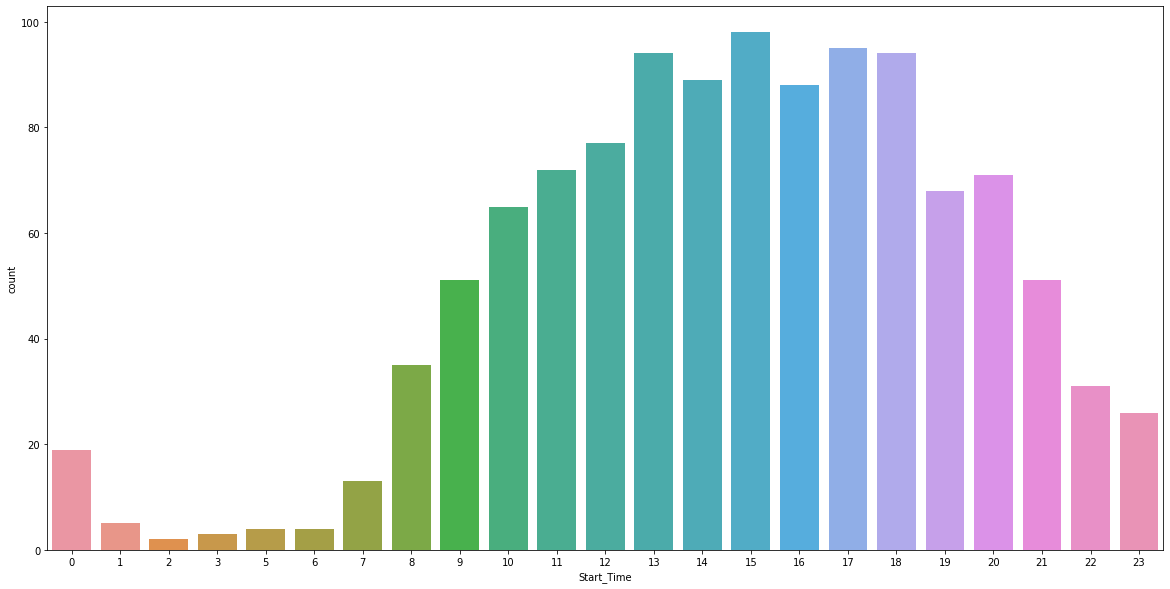

In [22]:
plt.figure(figsize=(20,10))
sns.countplot(datacopy['Start_Time'].dt.hour)

#### 1. The relationship between Purpose and Miles.

In [23]:
Pur_Mil = datacopy.groupby('PURPOSE*').mean()
Pur_Mil

,MILES*
PURPOSE*,
Airport/Travel,5.500000
Between Offices,10.944444
Charity ($),15.100000
Commute,180.200000
Customer Visit,20.688119
Errand/Supplies,3.968750
Meal/Entertain,5.698125
Meeting,15.247594
Moving,4.550000


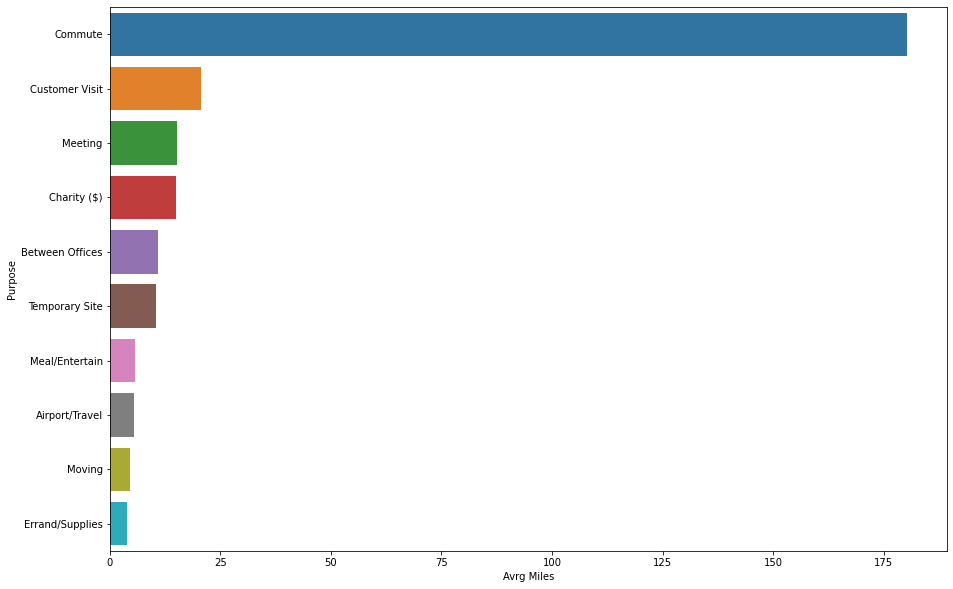

In [24]:
plt.figure(figsize=(15,10))
Pur_Mil['PURPOSE*']=Pur_Mil.index.tolist()
ax = sns.barplot(x='MILES*',y='PURPOSE*',data=Pur_Mil,order=Pur_Mil.sort_values('MILES*',ascending=False)['PURPOSE*'].tolist())
ax.set(xlabel='Avrg Miles', ylabel='Purpose')
plt.show()

#### 2. The relationship between Start Date and Miles.

A. Total Miles Per Month



In [26]:
rides_per_month = datacopy.groupby('Start_Date').sum()
rides_per_month['Month']=pd.to_datetime(rides_per_month.index.tolist()) #converting dates to a python friendly format
rides_per_month['Month']= rides_per_month['Month'].dt.to_period("M") #grouping dates by month
rides_per_month= rides_per_month.sort_values(by= 'Month',ascending=True)

In [27]:
total_miles_per_month =rides_per_month.groupby('Month').sum()

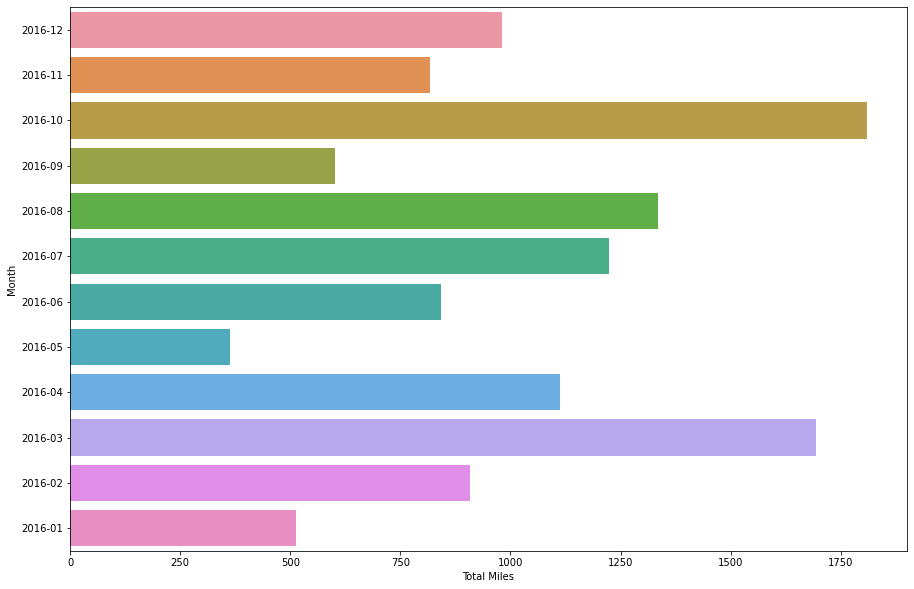

In [28]:
total_miles_per_month['MONTH'] = total_miles_per_month.index.tolist()
total_miles_per_month['MONTH'] = total_miles_per_month['MONTH'].astype(str) #converting the time stamp format to string
plt.figure(figsize=(15,10))
ax = sns.barplot(x='MILES*',y='MONTH',data=total_miles_per_month,order=total_miles_per_month.sort_values('MONTH',ascending=False)['MONTH'].tolist())
ax.set(xlabel='Total Miles', ylabel='Month')
plt.show()

#### 3. The relationship between CATEGORY and Miles.

In [29]:
CAT_Mil_SUM = datacopy.groupby('PURPOSE*').sum()
CAT_Mil_SUM

,MILES*
PURPOSE*,
Airport/Travel,16.5
Between Offices,197.0
Charity ($),15.1
Commute,180.2
Customer Visit,2089.5
Errand/Supplies,508.0
Meal/Entertain,911.7
Meeting,2851.3
Moving,18.2


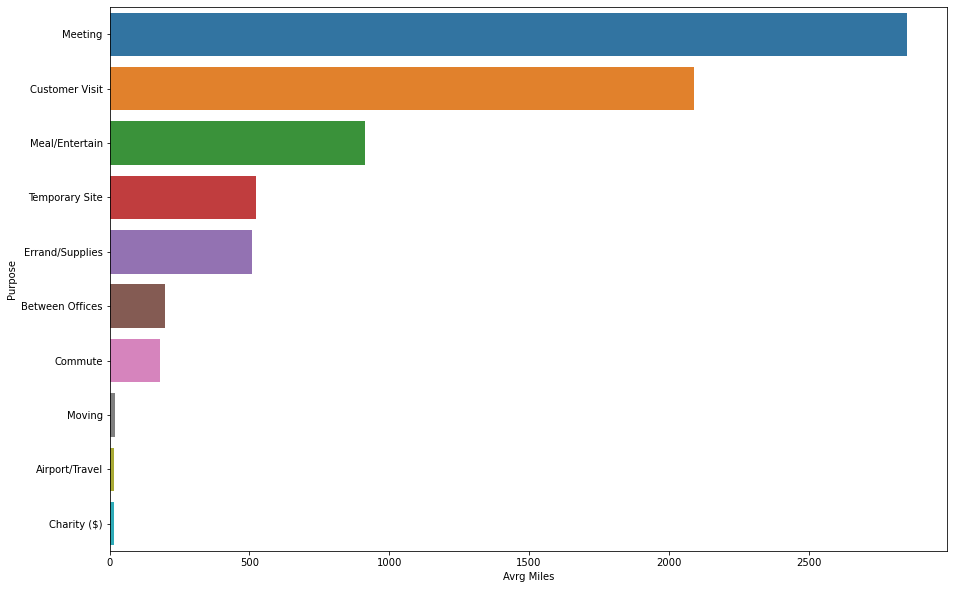

In [30]:
plt.figure(figsize=(15,10))
CAT_Mil_SUM ['PURPOSE*']=CAT_Mil_SUM .index.tolist()
ax = sns.barplot(x='MILES*',y='PURPOSE*',data=CAT_Mil_SUM ,order=CAT_Mil_SUM.sort_values('MILES*',ascending=False)['PURPOSE*'].tolist())
ax.set(xlabel='Avrg Miles', ylabel='Purpose')
plt.show()

In [31]:
CAT_Mil_Mean = datacopy.groupby('PURPOSE*').mean()
CAT_Mil_Mean

,MILES*
PURPOSE*,
Airport/Travel,5.500000
Between Offices,10.944444
Charity ($),15.100000
Commute,180.200000
Customer Visit,20.688119
Errand/Supplies,3.968750
Meal/Entertain,5.698125
Meeting,15.247594
Moving,4.550000


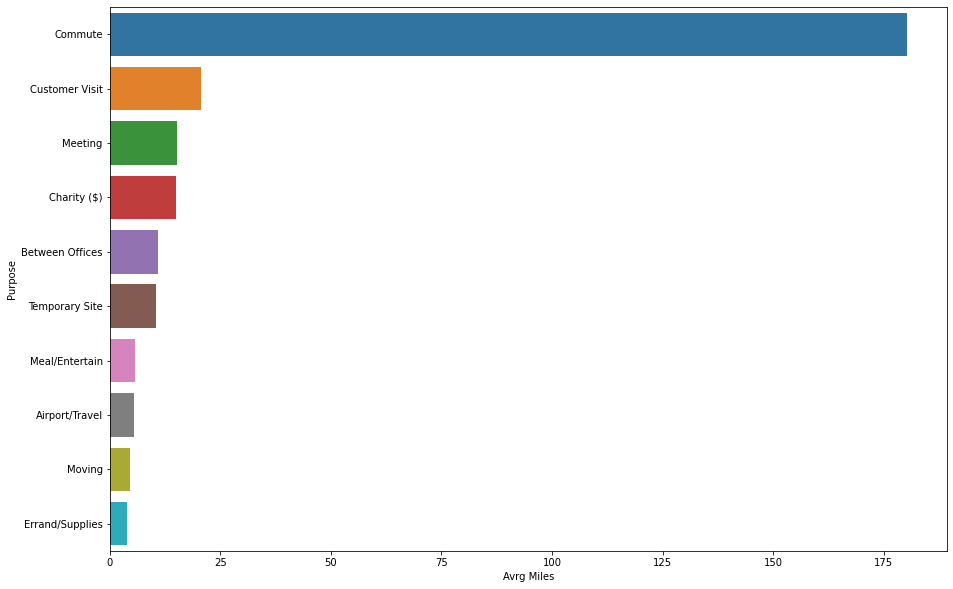

In [32]:
plt.figure(figsize=(15,10))
CAT_Mil_Mean['PURPOSE*']=CAT_Mil_Mean.index.tolist()
ax = sns.barplot(x='MILES*',y='PURPOSE*',data=CAT_Mil_Mean ,order=CAT_Mil_Mean.sort_values('MILES*',ascending=False)['PURPOSE*'].tolist())
ax.set(xlabel='Avrg Miles', ylabel='Purpose')
plt.show()

In [33]:
datacopy["End_Time"]=pd.to_datetime(datacopy["End_Time"],format="%H:%M")
datacopy["Start_Time"]=pd.to_datetime(datacopy["Start_Time"],format="%H:%M")
speed=datacopy["MILES*"]/((datacopy["End_Time"]-datacopy["Start_Time"]).dt.seconds/60)
print(speed)

0       0.850000
1       0.416667
2       0.369231
3       0.335714
4       0.950746
          ...   
1150    0.100000
1151    0.216667
1152    0.462857
1153    0.355556
1154    0.467961
Length: 1155, dtype: float64


     Start_Date          Start_Time    End_Date            End_Time CATEGORY*  \
0    2016-01-01 1900-01-01 21:11:00    1/1/2016 1900-01-01 21:17:00  Business   
1    2016-01-02 1900-01-01 01:25:00    1/2/2016 1900-01-01 01:37:00  Business   
2    2016-01-02 1900-01-01 20:25:00    1/2/2016 1900-01-01 20:38:00  Business   
3    2016-01-05 1900-01-01 17:31:00    1/5/2016 1900-01-01 17:45:00  Business   
4    2016-01-06 1900-01-01 14:42:00    1/6/2016 1900-01-01 15:49:00  Business   
...         ...                 ...         ...                 ...       ...   
1150 2016-12-31 1900-01-01 01:07:00  12/31/2016 1900-01-01 01:14:00  Business   
1151 2016-12-31 1900-01-01 13:24:00  12/31/2016 1900-01-01 13:42:00  Business   
1152 2016-12-31 1900-01-01 15:03:00  12/31/2016 1900-01-01 15:38:00  Business   
1153 2016-12-31 1900-01-01 21:32:00  12/31/2016 1900-01-01 21:50:00  Business   
1154 2016-12-31 1900-01-01 22:08:00  12/31/2016 1900-01-01 23:51:00  Business   

                START*     

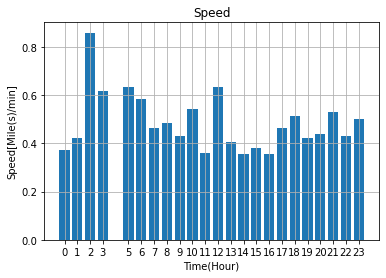

In [34]:
datacopy["SPEED*"]=speed
datacopy["START_HOUR*"]=datacopy["Start_Time"].dt.hour
print(datacopy[datacopy["SPEED*"]!=np.inf])
spd_df=datacopy[datacopy["SPEED*"]!=np.inf].groupby(["START_HOUR*"])["SPEED*"].mean()
print(spd_df)
#rects=plt.bar(range(0,len(spd_df.index)),spd_df.values)
rects=plt.bar(spd_df.index,spd_df.values)
plt.title("Speed")
plt.xlabel("Time(Hour)")
plt.ylabel("Speed[Mile(s)/min]")
plt.xticks(spd_df.index)
plt.grid()
plt.savefig("./speed_fig")